# Data: https://www.kaggle.com/shivam2503/diamonds

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import *
from sklearn.linear_model import SGDClassifier, LogisticRegression, LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor
from imblearn.datasets import make_imbalance

In [2]:
df = pd.read_csv('diamonds.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
for col in df.select_dtypes(exclude='O').columns:
    df[f'{col}_bin'] = pd.qcut(df[col],q=3,labels=[0,1,2])

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,carat_bin,depth_bin,table_bin,price_bin,x_bin,y_bin,z_bin
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,2,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,0,2,0,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,2,1,0,0,0,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,2,1,0,0,0,0


In [7]:
for col in df.select_dtypes(exclude='O').columns:
    df[col]=df[col].astype(float)

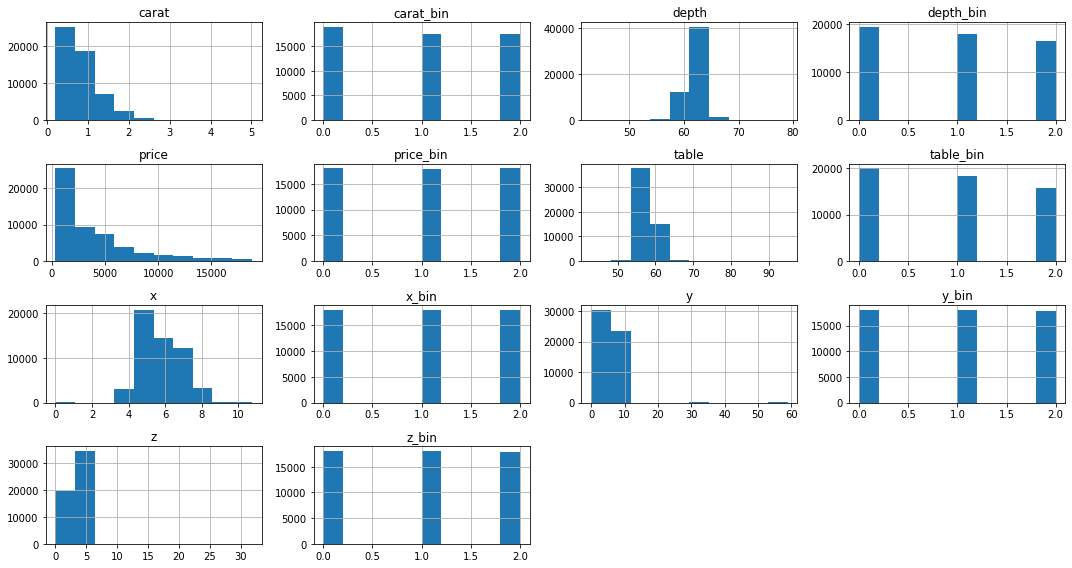

In [8]:
df.hist(figsize=(15,8))
plt.tight_layout()
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 17 columns):
carat        53940 non-null float64
cut          53940 non-null object
color        53940 non-null object
clarity      53940 non-null object
depth        53940 non-null float64
table        53940 non-null float64
price        53940 non-null float64
x            53940 non-null float64
y            53940 non-null float64
z            53940 non-null float64
carat_bin    53940 non-null float64
depth_bin    53940 non-null float64
table_bin    53940 non-null float64
price_bin    53940 non-null float64
x_bin        53940 non-null float64
y_bin        53940 non-null float64
z_bin        53940 non-null float64
dtypes: float64(14), object(3)
memory usage: 7.0+ MB


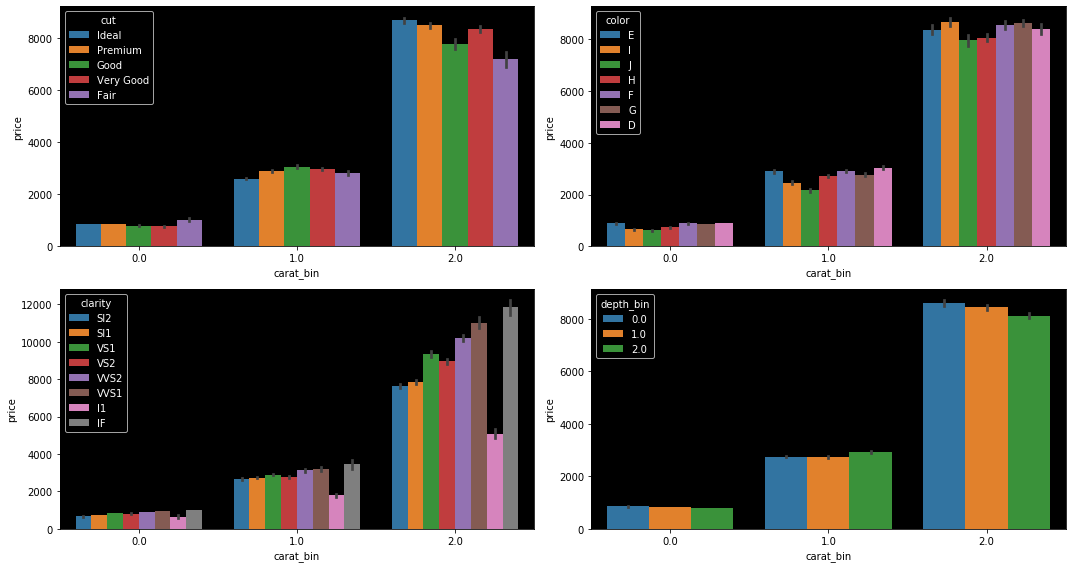

In [19]:
with sns.axes_style({'axes.facecolor':'black','text.color':'white'}):
    
    plt.figure(figsize=(15,8))
    
    plt.subplot(2,2,1)
    sns.barplot(df.carat_bin, df.price, hue=df.cut)
    plt.tight_layout()
    
    plt.subplot(2,2,2)
    sns.barplot(df.carat_bin, df.price, hue=df.color)
    plt.tight_layout()
    
    plt.subplot(2,2,3)
    sns.barplot(df.carat_bin, df.price, hue=df.clarity)
    plt.tight_layout()
    
    plt.subplot(2,2,4)
    sns.barplot(df.carat_bin, df.price, hue=df.depth_bin)
    plt.tight_layout()
    
    plt.show()

In [ ]:
with sns.axes_style({'axes.facecolor':'black','text.color':'white'}):
    
    plt.figure(figsize=(15,8))
    
    plt.subplot(2,2,1)
    sns.barplot(df.carat_bin, df.price, hue=df.cut)
    plt.tight_layout()
    
    plt.subplot(2,2,2)
    sns.barplot(df.carat_bin, df.price, hue=df.color)
    plt.tight_layout()
    
    plt.subplot(2,2,3)
    sns.barplot(df.carat_bin, df.price, hue=df.clarity)
    plt.tight_layout()
    
    plt.subplot(2,2,4)
    sns.barplot(df.carat_bin, df.price, hue=df.depth_bin)
    plt.tight_layout()
    
    plt.show()